# Анализ выходных данных

In [15]:
import pandas as pd
from rdkit import Chem
from IPython.display import display, Markdown

import seaborn as sns
import matplotlib.pyplot as plt
# ------------------------------------------------------
import sys
import os
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
from utils.utils import start
start()

SDF_FILE_PATH = "../results/scored_mols.sdf"

Настройки pandas`a применены


In [4]:
all_molecules_properties = []
suppl = Chem.SDMolSupplier(SDF_FILE_PATH)
for mol in suppl:
    all_molecules_properties.append(mol.GetPropsAsDict())
df = pd.DataFrame(all_molecules_properties)
display(df.head(3))

,Structure No,Brutto-formula,Molecular weight,Product Name,Short Description for web display,CAS,Stock amount,Pathway,Target,IDNUMBER,PRICE,SMILE,InChI,InChI_Key,Type of molecule,Alias,Monoisotopic Mass,Monoisotopic Mass 2,cLogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,Polar Surface Area,Druglikeness,Molecular Complexity,Metal-Atoms,Stereo Centers,Rotatable Bonds,Largest Ring Size,Small Rings,Aromatic Rings,Electronegative Atoms,sp3-Carbon Fraction,Largest Ring Size 2,Small Rings 2,Aromatic Rings 2,SynthScore
0,37706.0,C22H27ClN6O,426.95,LY2828360,LY2828360 is a cannab...,1231220-79-3,1238.45,GPCR/G Protein,Cannabinoid Receptor,CE05-6361,"2 mg - 37, 5 mg - 47,...",Cc(nc1N2CCN(C)CC2)nc2...,InChI=1S/C22H27ClN6O/...,UCMNDPDJRSEZPL-UHFFFA...,Clinical,,426.1935,426.1935,3.4037,-3.897,7.0,0.0,319.22,59.31,3.5365,,0.0,0.0,3.0,6.0,5.0,3.0,8.0,0.5000,6.0,5.0,3.0,55.6604
1,5078.0,C23H22N8O,426.48,AB928,AB928 is an orally bi...,2239273-34-6,2265.40,GPCR/G Protein|||Neur...,Adenosine Receptor,CE01-8060,"1 mg - 46, 5 mg - 126...",CC(C)(c1nc(Cn2nnc(-c3...,InChI=1S/C23H22N8O/c1...,BUXIAWLTBSXYSW-UHFFFA...,Clinical,,426.1917,426.1917,2.0079,-4.492,9.0,2.0,333.07,139.42,-7.9579,,0.0,0.0,5.0,6.0,4.0,4.0,9.0,0.2174,6.0,4.0,4.0,64.2893
2,43171.0,C20H18O4,322.36,5-Dehydroxyparatocarp...,5-Dehydroxyparatocarp...,124858-37-3,5.00,Others,Others,CE06-5141,5 mg - 1540,CC(C)(C=Cc1c2)Oc1cc(O...,InChI=1S/C20H18O4/c1-...,AZNAWXMYPBINIJ-QGZVFW...,,,322.1205,322.1205,3.8738,-4.491,4.0,1.0,237.81,55.76,-1.4004,,0.0,1.0,1.0,6.0,4.0,2.0,4.0,0.2500,6.0,4.0,2.0,47.5844


In [6]:
df["SynthScore"].describe()

count    500.0000
mean      56.0366
std       15.8669
min        0.0000
25%       45.8675
50%       54.7968
75%       65.7639
max      100.0000
Name: SynthScore, dtype: float64

Метрика SynthScore измеряется в пределах -> [0; 100]
* Минимальное значение SynthScore -> 0
* Максимальное значение SynrhScore -> 100
* Среднее значение -> 56.04

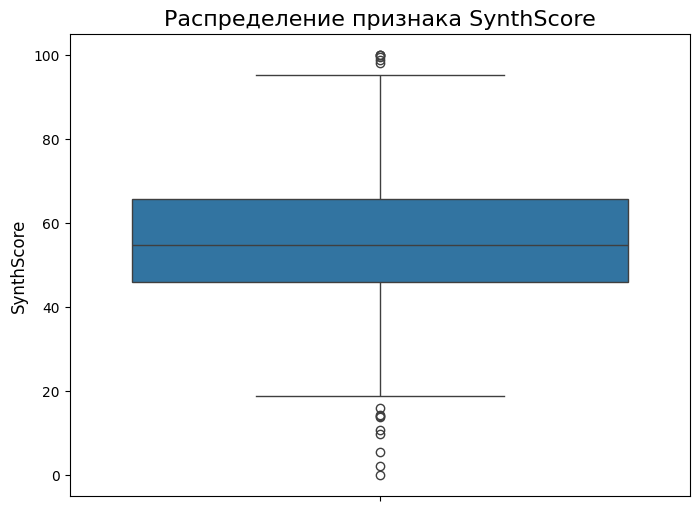

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["SynthScore"])
plt.title('Распределение признака SynthScore', fontsize=16)
plt.ylabel('SynthScore', fontsize=12)
plt.show()

# Молекулы с низкой синтетической сложностью

In [1]:
# df[df["SynthScore"]<5]

# Молекулы с высокой синтетической сложностью

In [2]:
# df[df["SynthScore"]>99]

# Молекулы без найденного пути